# Research of ads for the sale of apartments

At your disposal, the Yandex.mbesmikism service data is an archive of announcements on the sale of apartments in St. Petersburg and neighboring settlements for several years.You need to learn how to determine the market value of real estate objects.Your task is to set the parameters.This will allow you to build an automated system: it will track anomalies and fraudulent activities.

For each apartment, two types of data are available for sale.The former are inscribed by the user, the latter - received automatically on the basis of cartographic data.For example, the distance to the center, the airport, the nearest park and the reservoir.

### The description of the data
- `airports_nearest` - distance to the nearest airport in meters (m)
- `balcony` - number of balconies
- `ceiling_height` - ceiling height (m)
- `Citycenters_nearest` - distance to the city center (m)
- `days_exposition` - how many days the announcement was posted (from publication to removal)
- `first_day_exposition` - date of publication
- `floor` - floor
- `floors_total` - all floors in the house
- `is_apartment` - apartments (Bulev type)
- `kitchen_area` - the area of ​​the kitchen in square meters (m²)
- `last_price` - price at the time of removal from the publication
- `Living_area` - living area in square meters (m²)
- `locality_name` - name of the village
- `open_plan` - Free layout (Bulev type)
- `parks_around3000` - the number of parks within a radius of 3 km
- `parks_nearest` - distance to the nearest park (m)
- `ponds_around3000` - the number of reservoirs within a radius of 3 km
- `ponds_nearest` - distance to the nearest reservoir (m)
- `rooms` - number of rooms
- `studio`- Studio apartment (Bulev type)
- `total_area` - the total area of ​​the apartment in square meters (m²)
- `total_images` - the number of photos of the apartment in the ad

## We open the file with data and study the general information

In [84]:
import pandas as pd
import numpy as np
import os

# pip install scikit-learn==1.1.3
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [85]:
try:
    path = os.path.join('/datasets/real_estate_data.csv')
    data = pd.read_csv(path, sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

In [86]:
display(data.head())
display(data.tail())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00
23698,4,"1,350,000.00",32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [88]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


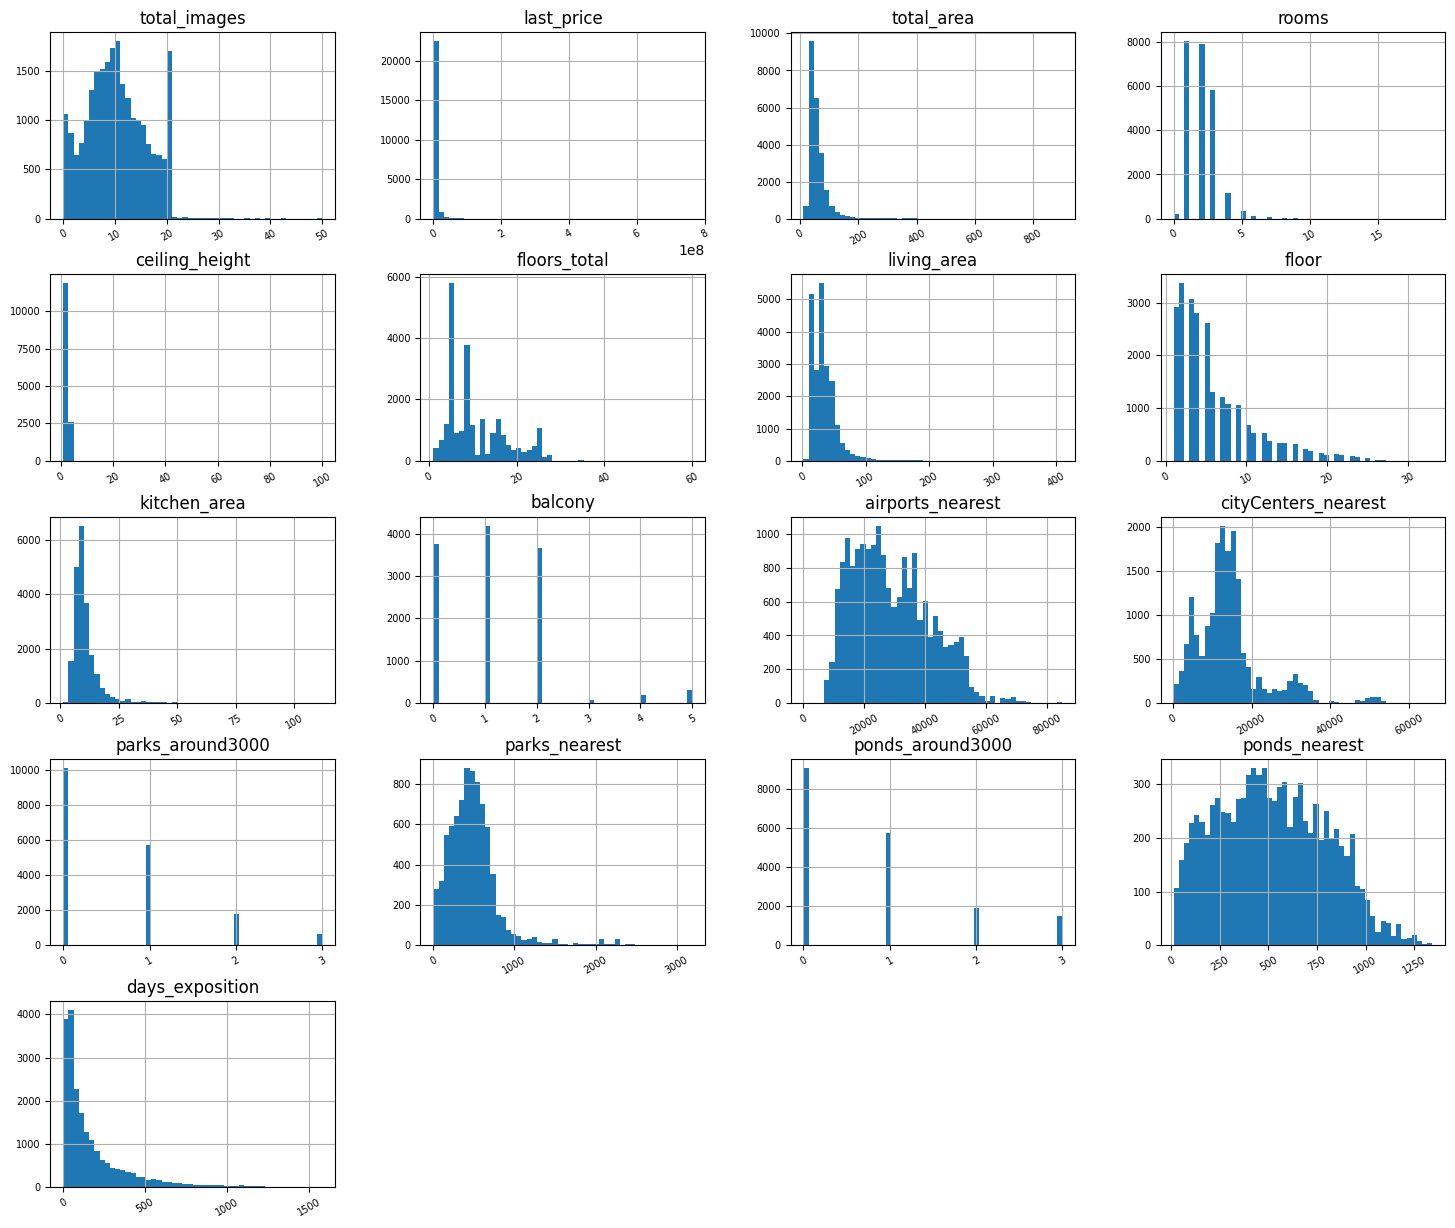

In [89]:
data.hist(bins=50, figsize=(18, 15), xlabelsize=7, xrot=30, ylabelsize=7);

### Conclusions:
- There is a camel register in the columns and not all names describe the essence well, it is worth renaming them
- I would like to group columns more conveniently in order to make it more convenient to analyze the data
- There are many missed data in column (`ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`). If possible, it should be fixed
- `is_apartment` has the type of data Object, it will be more convenient to bring it to the format of Bool
- `first_day_exposition` transfer to the date
- `ceiling_height` on the histogram there are emissions, most likely errors in the data
- `last_price` on the histogram there are strong emissions, perhaps this is some kind of elite real estate, or maybe a mistake, it is worth studying it

## Data pre-precessing

### Rename the columns
Names in the camel register and other non-quality names.
Bool type columns should be renamed with`is_` prefix by analogy with `is_apartment` column.

We will display the list for convenience:

In [90]:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [91]:
data = data.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest', 
    'balcony': 'number_of_balconies', 
    'rooms': 'number_of_rooms',
    'studio': 'is_studio',
    'open_plan': 'is_open_plan'
})

data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area',
 'number_of_balconies',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

### Change the sequence of columns

We group them into categories:
- Date;
- location;
- characteristics of the apartment;
- environment;
- price;
- photos

In [92]:
data = data[[
    'first_day_exposition',
    'days_exposition',
    'locality_name',
    'city_centers_nearest',
    'airports_nearest',
    'parks_nearest',
    'ponds_nearest',
    'parks_around3000',
    'ponds_around3000',
    'number_of_rooms',
    'number_of_balconies',
    'total_area',
    'living_area',
    'kitchen_area',
    'floors_total',
    'floor',
    'ceiling_height',
    'is_apartment',
    'is_studio',
    'is_open_plan',
    'last_price',
    'total_images',
]]

### Work with passes

There are many passes in the column with the number of balconies.Most likely, people do not fill this value when there are no balconies.We fill in the passes of zeros and translate the meaning into the whole, otherwise one and a half balcony is something strange

In [93]:
data['number_of_balconies'] = data['number_of_balconies'].fillna(0).astype('int64')

We will get rid of passes in the column with apartments, and at the same time we will draw it in Bulev type

In [94]:
data['is_apartment'] = data['is_apartment'].fillna(False)

We delete the line in which the name of the settlement is absent.There are few such lines and they will not affect the sample much, and do not benefit for research becauseIt is not even known about what this apartment is

In [95]:
data.dropna(subset=['locality_name'], inplace=True)

`living_area` and `kitchen_area` have gaps, fill them with average values ​​corresponding to the total area.
Check the correlation of these parameters

'correlation of living area to total area is: 0.94'

'correlation of kitchen area to total area is: 0.61'

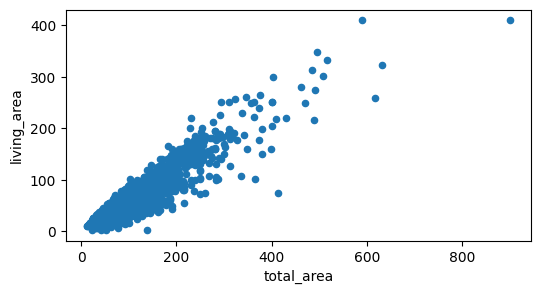

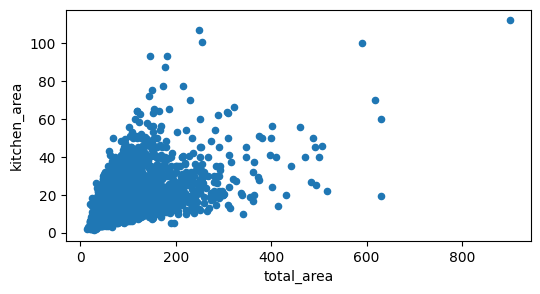

In [96]:
data.plot(x='total_area', y='living_area', kind='scatter', figsize=(6, 3))
data.plot(x='total_area', y='kitchen_area', kind='scatter', figsize=(6, 3))

living_area_to_total_corr = data['total_area'].corr(data['living_area'])
kitchen_area_to_total_corr = data['total_area'].corr(data['kitchen_area'])

display(f'correlation of living area to total area is: {living_area_to_total_corr:.2f}')
display(f'correlation of kitchen area to total area is: {kitchen_area_to_total_corr:.2f}')

The correlation is positive, it is clearly visible, I think that filling out the missed data with support for the total area is quite suitable.
We use the method of [MissForest](https://towardsdatascience.com/missforest-the-best-missing-data-imputation-algorithm-4d01182aed3 "MissForest")

In [97]:
areas_imput = data.loc[:,'total_area':'kitchen_area']

imputer = MissForest()
areas_imput = imputer.fit_transform(areas_imput)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [98]:
data['living_area'] = areas_imput[:, 1]
data['kitchen_area'] = areas_imput[:, 2]

Let's check if the abnormal emissions appeared in the re-enemies diagrams:

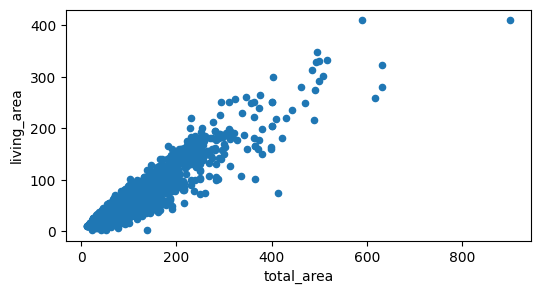

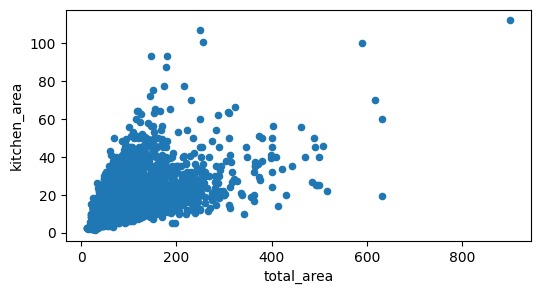

In [99]:
data.plot(x='total_area', y='living_area', kind='scatter', figsize=(6, 3))
data.plot(x='total_area', y='kitchen_area', kind='scatter', figsize=(6, 3));

No, all new points fell into the same dialogue, the algorithm threw off as it should

The same method will fill in several missing cells in the number of floors

In [100]:
floors_imput = data.loc[:,'floors_total':'floor',]

floors_imput = imputer.fit_transform(floors_imput)

Iteration: 0
Iteration: 1
Iteration: 2


In [101]:
data['floors_total'] = np.round(floors_imput[:, 0], 0).astype('int64')

Let's look at the histogram of dependence to make sure that the method did not give us values ​​with the number of floors of the house less than the floor on which the apartment is located

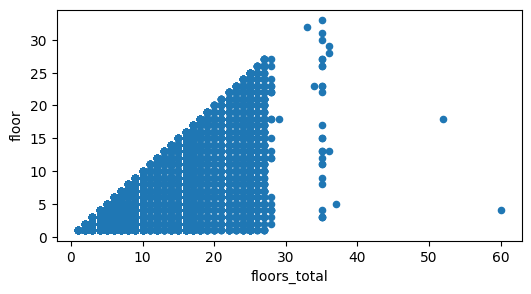

In [102]:
data.plot(x='floors_total', y='floor', kind='scatter', figsize=(6, 3));

We see a straight line under 45 degrees, there is nothing on top, therefore there are no apartments on the floors above the number of storeys at home, the algorithm did not give anomalous values ​​and again worked correctly

Let's look at the remaining gaps

In [103]:
data.isnull().sum().sort_values(ascending=False)/data.shape[0]*100

parks_nearest          65.90
ponds_nearest          61.59
ceiling_height         38.73
airports_nearest       23.40
city_centers_nearest   23.30
parks_around3000       23.30
ponds_around3000       23.30
days_exposition        13.45
first_day_exposition    0.00
floor                   0.00
last_price              0.00
is_open_plan            0.00
is_studio               0.00
is_apartment            0.00
total_area              0.00
floors_total            0.00
kitchen_area            0.00
living_area             0.00
number_of_balconies     0.00
number_of_rooms         0.00
locality_name           0.00
total_images            0.00
dtype: float64

Apparently, these are simply not filled fields, not all people want to fill in the height of the ceilings, the range to parks and ponds.
The nature of the passes in the column with the time of publication of the announcement is not clear.This looks like a mistake, either a technical or a human factor when working with data, but these data for good should be generated automatically.
Remember this and so far we continue the analysis with these passes, probably this is not so critical

### Correction of Data Types

Above, in the course of work with passes, in parallel we have already corrected some columns, rounding in them the values ​​to the integer, and the speaker of the pharmacies made a type of Bool.Let's look at the remaining:

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   first_day_exposition  23650 non-null  object 
 1   days_exposition       20470 non-null  float64
 2   locality_name         23650 non-null  object 
 3   city_centers_nearest  18139 non-null  float64
 4   airports_nearest      18116 non-null  float64
 5   parks_nearest         8064 non-null   float64
 6   ponds_nearest         9085 non-null   float64
 7   parks_around3000      18140 non-null  float64
 8   ponds_around3000      18140 non-null  float64
 9   number_of_rooms       23650 non-null  int64  
 10  number_of_balconies   23650 non-null  int64  
 11  total_area            23650 non-null  float64
 12  living_area           23650 non-null  float64
 13  kitchen_area          23650 non-null  float64
 14  floors_total          23650 non-null  int64  
 15  floor                 23

`first_Day_Exposition` transfer to the date format.Example of the old format: 2017-03-21T00:00:00

In [105]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
display(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

We pay attention that only dates are indicated, time is absent

### check duplicates

In [106]:
data.duplicated().sum()

0

There are no obvious duplicates, it is worth checking the names of settlements

In [107]:
len(data['locality_name'].unique())

364

In [108]:
data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

364 Names.At first glance, it is difficult to evaluate, but for starters it is worth trying to transfer everything to the lower register.
And there is definitely a problem with the letter e

In [109]:
data['locality_name'] = data['locality_name'].str.lower()
len(data['locality_name'].unique())

364

In [110]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
len(data['locality_name'].unique())

330

The lower register did not save us from duplicates, but when we removed E, there were as many as 34 duplicating names, this is already the result.
Let's try to reduce the names of the types of settlement:

In [111]:
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок', regex=True)

In [112]:
len(data['locality_name'].unique())

318

Another 12 dulicates

### We will figure out anomalous values ​​in the column with the height of the ceilings.

Apparently, some values ​​were recorded without a comma.Check this hypothesis, look at the histogram

<Axes: >

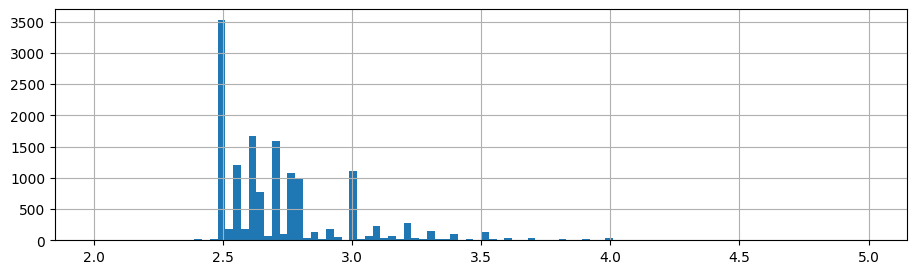

In [113]:
data['ceiling_height'].hist(bins=100, range=(2, 5), figsize=(11, 3))

The vast majority of apartments begin with a height of ceilings of 2.5 meters.We bring the histogram in the area 25 m

<Axes: >

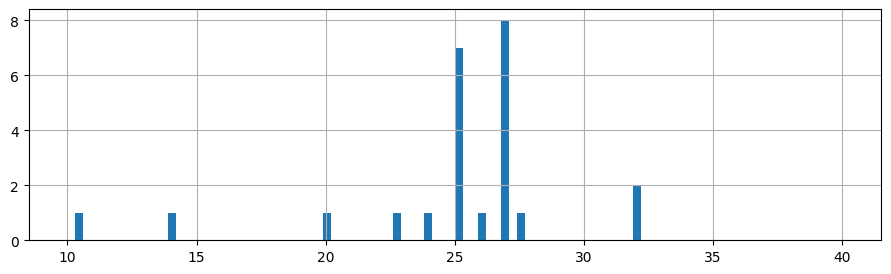

In [114]:
data['ceiling_height'].hist(bins=100, range=(10, 40), figsize=(11, 3))

It seems that our hypothesis is true, there is a surge of 25 meters, exactly 10 times more.Correct this

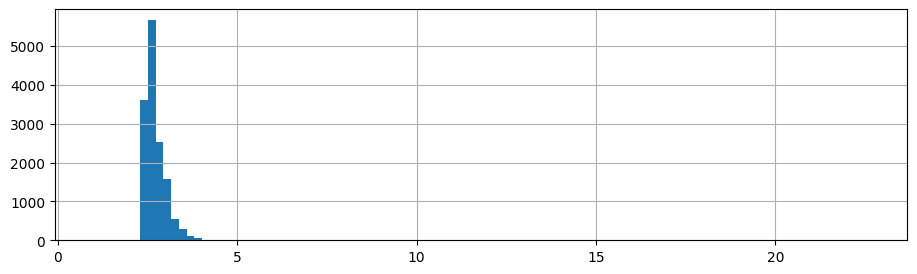

In [115]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 23, data['ceiling_height']/10)
data['ceiling_height'].hist(bins=100, figsize=(11, 3));

There is still an emission up to more than 20 meters, get rid of them

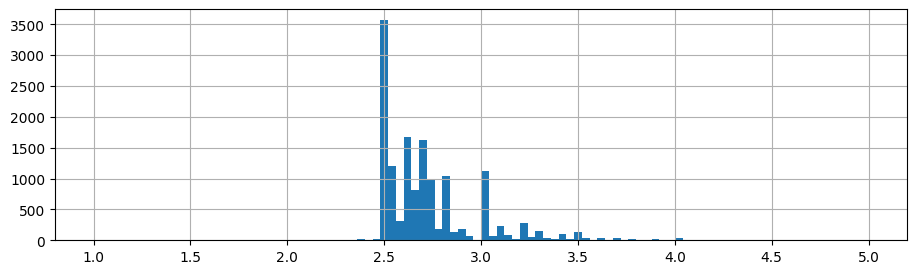

In [116]:
data = data.drop(data[data['ceiling_height'] > 5].index)
data['ceiling_height'].hist(bins=100, figsize=(11, 3));

### We will understand the abnormal values ​​in the column with the price

First, we format the price format, transfer it to millions for convenience

In [117]:
data['last_price'] = data['last_price'] / 1000000

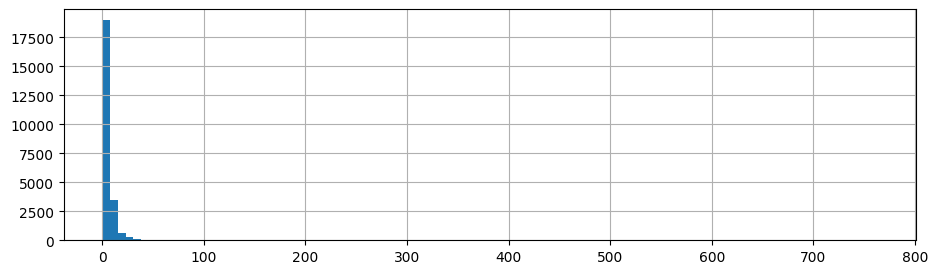

In [118]:
data['last_price'].hist(bins=100, figsize=(11, 3));

Emissions up to 800 million per apartment, after about 50 million the number of apartments is slightly, get rid of these emissions

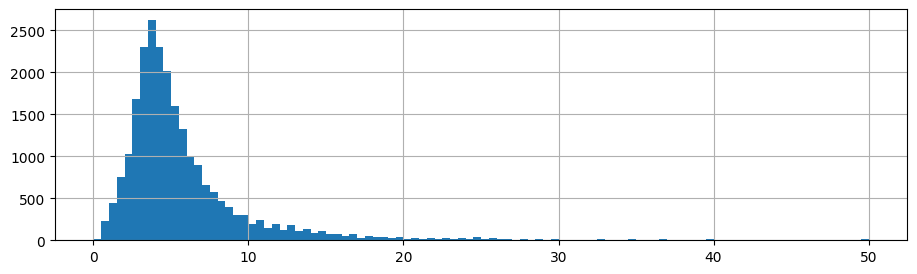

In [119]:
data = data.drop(data[data['last_price'] > 50].index)
data['last_price'].hist(bins=100, figsize=(11, 3));

### We will understand the abnormal values ​​in the column with the number of rooms

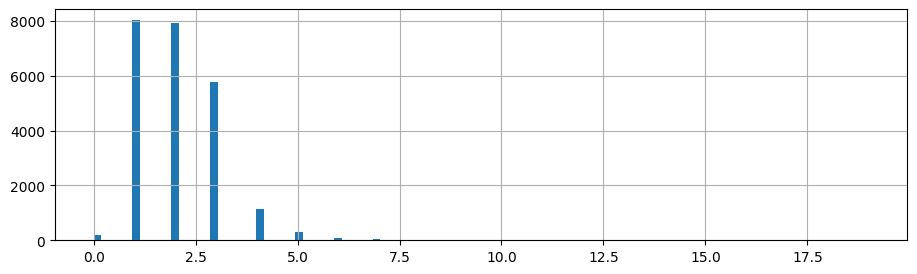

In [120]:
data['number_of_rooms'].hist(bins=100, figsize=(11, 3));

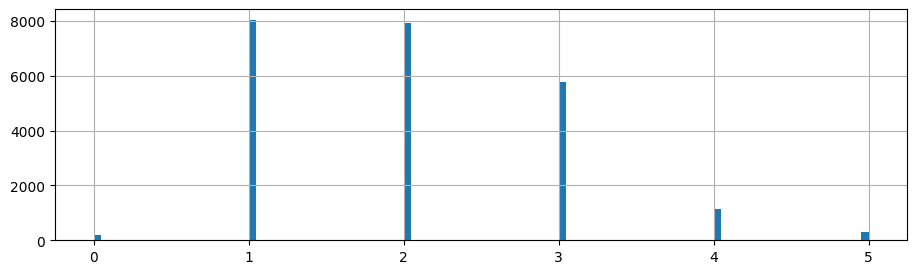

In [121]:
data = data.drop(data[data['number_of_rooms'] > 5].index)
data['number_of_rooms'].hist(bins=100, figsize=(11, 3));

### We will understand the abnormal values ​​in the column with the area

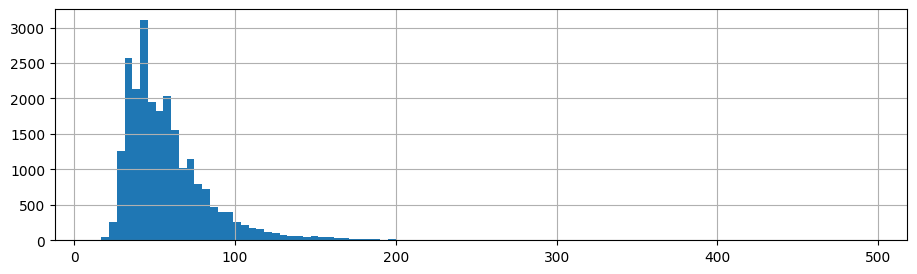

In [122]:
data['total_area'].hist(bins=100, figsize=(11, 3));

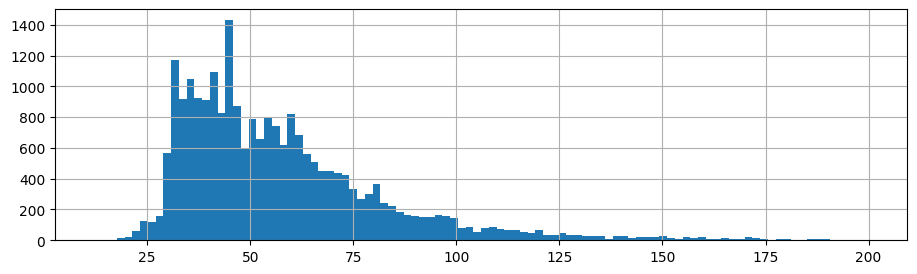

In [123]:
data = data.drop(data[data['total_area'] > 200].index)
data['total_area'].hist(bins=100, figsize=(11, 3));

## calculate and add new columns to the table

Add a column with a price per square meter

In [124]:
data['price_for_m2'] = data['last_price']/data['total_area']*1000000

Add the tableter with the day of the week of publication of the announcement

In [125]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

Add the tableter with the month of the publication of the announcement

In [126]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Add the tableter with the year of publication of the announcement

In [127]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Add the tableter with the type of floor

In [128]:
def floor_type(df):
    if df['floor'] == 1:
        return 'первый'
    elif df['floor'] == df['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis=1)

We translate the distance kilometers and add as a new column

In [129]:
data['city_centers_nearest_km'] = np.round(data['city_centers_nearest'] / 1000, 0)

## Conduct a research data analysis

### The total area

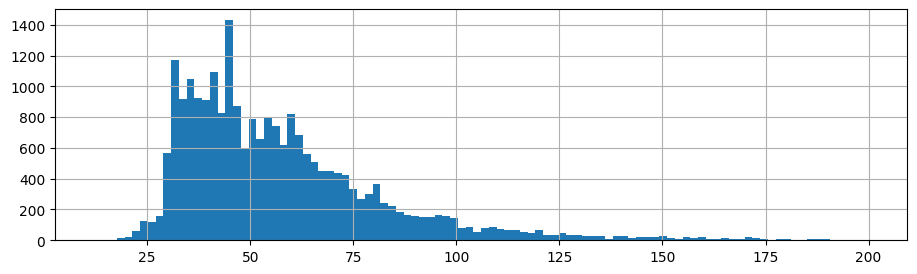

In [130]:
data['total_area'].hist(bins=100, figsize=(11, 3));

The total area begins about 30 meters, has a peak around 50 meters and gradually subsides to 150 meters

### Living Square

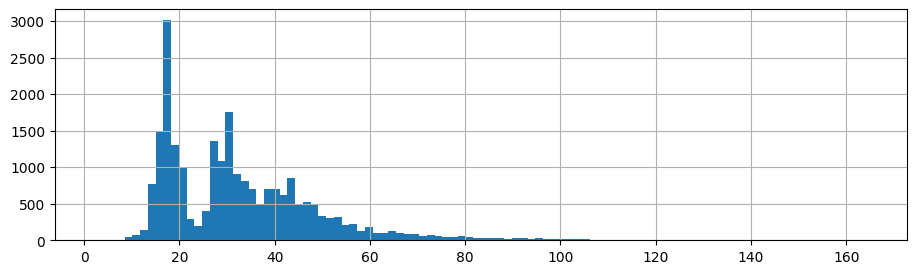

In [131]:
data['living_area'].hist(bins=100, figsize=(11, 3));

Peaks near 18 and 30 meters.You can see another small peak near 43m.We filled the empty cells in this column, but two peaks were in the withdrawal of histograms at the beginning of work, on raw data, so we exclude our mistake.It can be assumed that these peaks are 1-on, 2 and 3-room apartments.If so, then most likely we will see a peak in one -room apartments in a histogram of distribution by the number of rooms

### Square of the kitchen

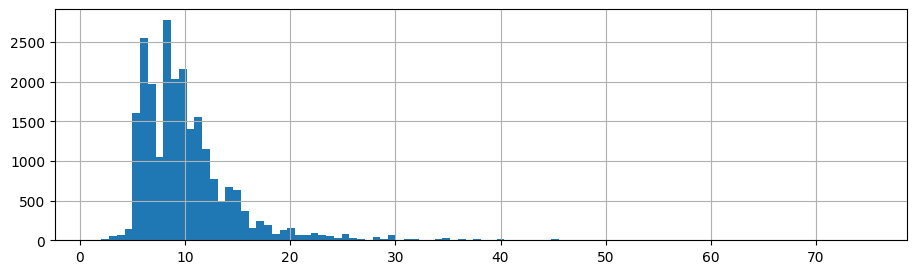

In [132]:
data['kitchen_area'].hist(bins=100, figsize=(11, 3));

There is a peak from 6 to 10 meters and emissions up to hundreds of meters

### the price of an object

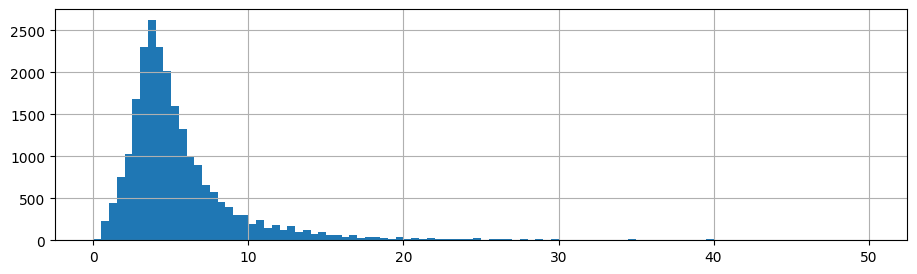

In [133]:
data['last_price'].hist(bins=100, figsize=(11, 3));

Normal distribution, with a peak near 4 million and a tail leaving towards a rich life =)

### the number of rooms

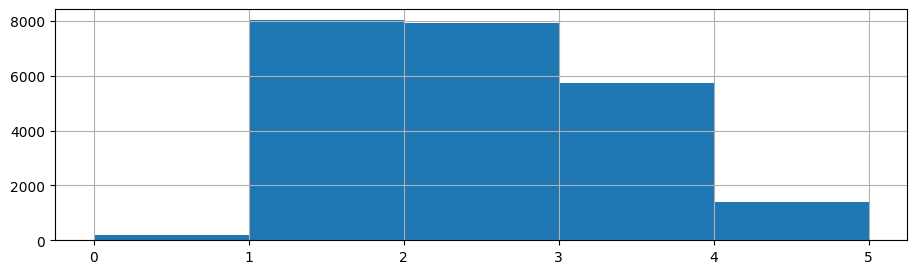

In [134]:
data['number_of_rooms'].hist(bins = data['number_of_rooms'].max(), figsize=(11, 3));

Most 1-room apartments, a little less than 2-room apartments, after 4-5 rooms there is a tail, but the number of such ads is very small.There is also a value of 0. Perhaps this is the apartments of the studio.Check:

In [135]:
data.loc[data['number_of_rooms'] == 0, 'number_of_rooms'].count()

195

In [136]:
data.loc[(data['number_of_rooms'] == 0) & (data['is_studio'] == True), 'number_of_rooms'].count()

137

As a rule, yes, but not all.Let's look at the remaining

In [137]:
data.loc[(data['number_of_rooms'] == 0) & (data['is_studio'] == False)]

,first_day_exposition,days_exposition,locality_name,city_centers_nearest,airports_nearest,parks_nearest,ponds_nearest,parks_around3000,ponds_around3000,number_of_rooms,number_of_balconies,total_area,living_area,kitchen_area,floors_total,floor,ceiling_height,is_apartment,is_studio,is_open_plan,last_price,total_images,price_for_m2,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
349,2017-09-27,45.00,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,0,0,25.00,17.00,4.67,14,1,NaN,False,False,True,2.32,4,"92,800.00",2,9,2017,первый,NaN
508,2017-03-28,430.00,поселок парголово,"19,292.00","53,115.00",NaN,593.00,0.00,1.00,0,1,34.40,24.30,7.47,26,19,NaN,False,False,True,3.38,0,"98,110.47",1,3,2017,другой,19.00
780,2018-02-20,45.00,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,0,1,26.10,18.25,5.26,18,8,NaN,False,False,True,2.60,9,"99,616.86",1,2,2018,другой,NaN
839,2017-04-14,7.00,поселок новый свет,NaN,NaN,NaN,NaN,NaN,NaN,0,1,35.00,15.00,9.63,5,3,2.70,False,False,True,1.90,14,"54,285.71",4,4,2017,другой,NaN
946,2016-09-27,483.00,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,0,2,23.00,18.00,4.42,27,7,NaN,False,False,True,2.20,5,"95,652.17",1,9,2016,другой,NaN
1574,2017-11-03,81.00,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,0,1,22.00,15.00,5.31,18,16,NaN,False,False,True,2.20,0,"100,000.00",4,11,2017,другой,NaN
1625,2018-02-01,120.00,поселок корнево,NaN,NaN,NaN,NaN,NaN,NaN,0,1,23.98,10.50,6.22,4,3,NaN,False,False,True,1.98,7,"82,568.81",3,2,2018,другой,NaN
2532,2018-02-01,70.00,санкт-петербург,"8,175.00","32,036.00",NaN,644.00,0.00,1.00,0,2,27.10,18.70,3.79,18,9,NaN,False,False,True,3.50,5,"129,151.29",3,2,2018,другой,8.00
3019,2017-11-10,5.00,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,0,2,24.00,18.00,5.89,10,6,NaN,False,False,True,2.10,18,"87,500.00",4,11,2017,другой,NaN
4115,2018-02-01,42.00,санкт-петербург,"13,330.00","10,031.00",915.00,NaN,1.00,0.00,0,2,24.00,18.00,5.89,25,4,NaN,False,False,True,2.60,7,"108,333.33",3,2,2018,другой,13.00


All of them are open, here is the answer from where we have real estate with 0 rooms.

### the height of the ceilings

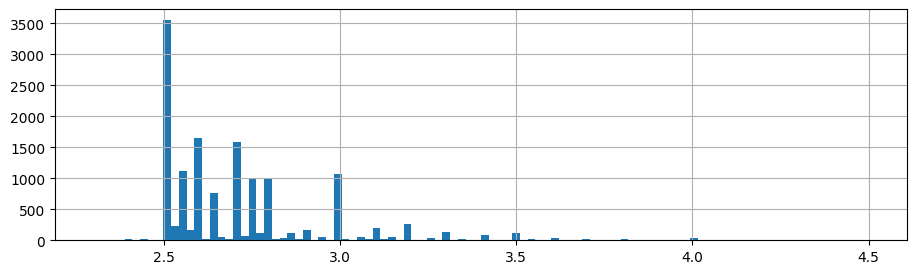

In [138]:
data['ceiling_height'].hist(bins=100, figsize=(11, 3), range=(2.3, 4.5));

We have a peak at 2.5 mattresses, a certain significant number of values ​​between 2.5 and 3 meters and housing with carts above 3 meters is already a rarity

### The floor of the apartment

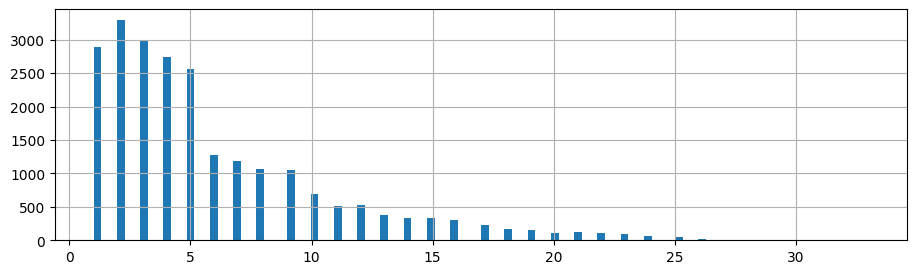

In [139]:
data['floor'].hist(bins=100, figsize=(11, 3));

Most apartments are on the 1-5 floor, apparently Khrushchevs affect statistics

### Type of the floor of the apartment ("First", "Last", "Other")

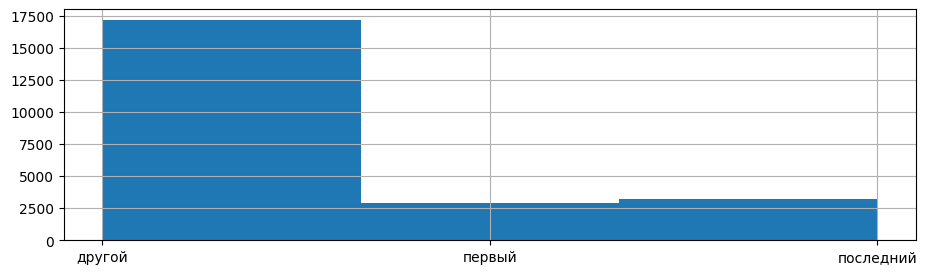

In [140]:
data['floor_type'].hist(bins=3, figsize=(11, 3));

“Another” leads us, and the first and the latter are approximately equal to each other, the picture is quite expected, we move on

### The total number of floors in the house

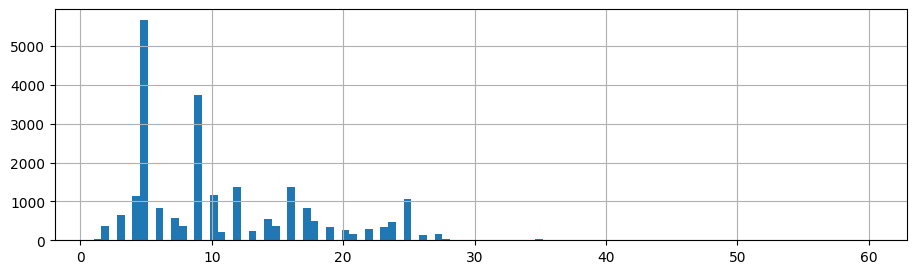

In [141]:
data['floors_total'].hist(bins=100, figsize=(11, 3));

And here again, Khrushchevs make themselves felt, there is a peak on 5 floors, as well as 9 floors, also a frequent type of houses.There are emissions up to 60, there are skyscrapers in St. Petersburg, you can imagine this, Imali is most likely not here

### distance to the city center

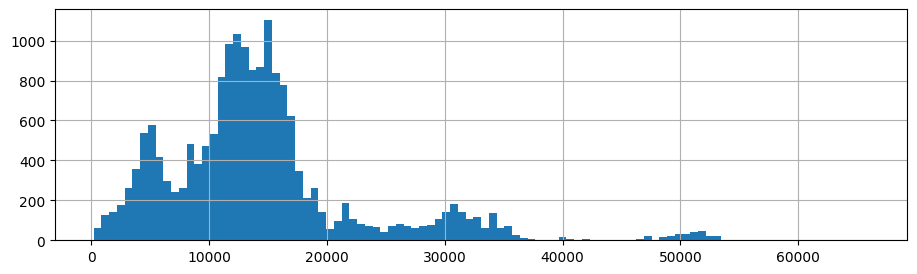

In [142]:
data['city_centers_nearest'].hist(bins=100, figsize=(11, 3));

There are two large peaks, at 5 km and 12 km.Apparently one peak is St. Petersburg and the distances to its center, and since it is large, there is much more distances there than in the surrounding cities, therefore, a peak of 12 km is most likely for the most part Peter, and the peak is smaller, this is the influence of other cities.A small rise near 30 km, this is most likely suburban real estate and the distance to the center of St. Petersburg is indicated.

### distance to the nearest airport

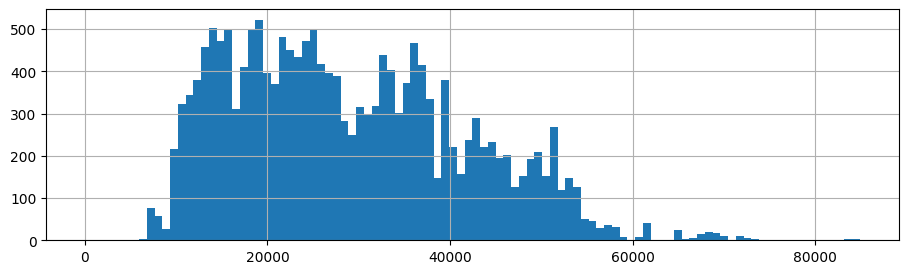

In [143]:
data['airports_nearest'].hist(bins=100, figsize=(11, 3));

Almost no one lives next to the Eerorta (or does not want to talk about it in an ad).Further, the distribution of believable, taking into account the fact that Pulkovo from the center of St. Petersburg is about 15 km, is precisely there is the main accumulation of proposals

### distance to the nearest park

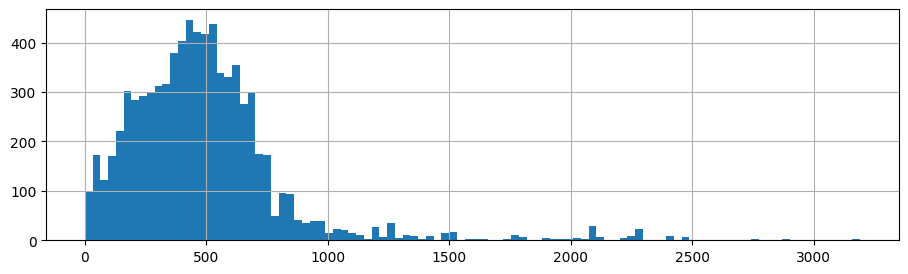

In [144]:
data['parks_nearest'].hist(bins=100, figsize=(11, 3));

The bulk of the parks are about 500 m from housing, and someone lives right in the park =)

But it is worth remembering that the distance to the park is not indicated in 2/3 of the ads, or did not indicate or there is no park nearby

### day and month of announcement

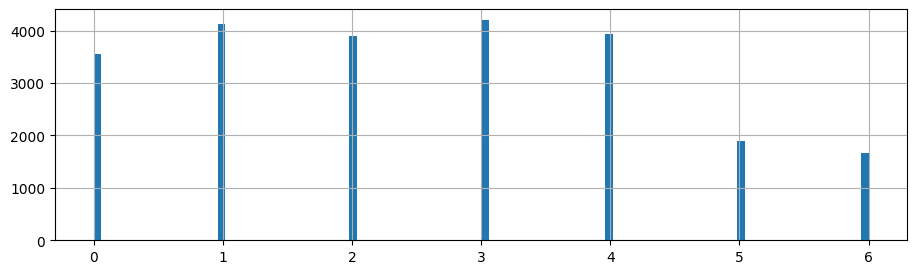

In [145]:
data['weekday_exposition'].hist(bins=100, figsize=(11, 3));

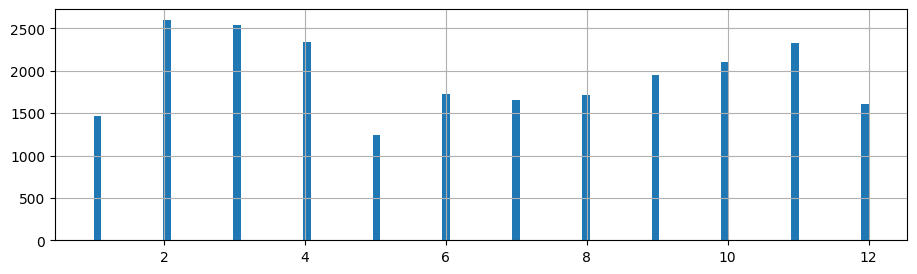

In [146]:
data['month_exposition'].hist(bins=100, figsize=(11, 3));

Refusions on the weekend are visible, on the weekend, the majority are not up to red tape with ads apparently.

There is also a decline in January and May, which is also explained by a large number of weekends and vacations.In summer, ads give less often, and the peak itself is spring, especially February

### We will study how quickly apartments were sold

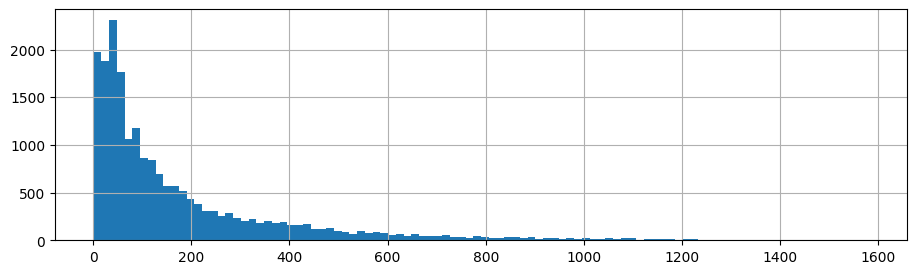

In [147]:
data['days_exposition'].hist(bins=100, figsize=(11, 3));

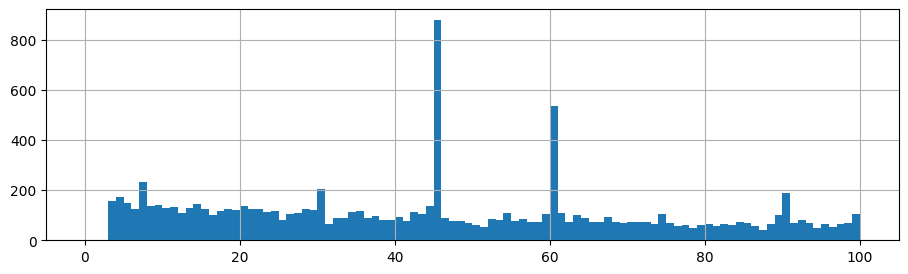

In [148]:
data['days_exposition'].hist(bins=100, figsize=(11, 3), range=(0, 100));

In [149]:
data['days_exposition'].describe()

count   20,191.00
mean       179.09
std        218.01
min          1.00
25%         45.00
50%         94.00
75%        228.00
max      1,580.00
Name: days_exposition, dtype: float64

The distribution has the form of Poisson’s distribution, the average indicator is half a year, but since we have very large emissions on the histogram, and most of the data lies in the range of up to 231 days, the average value here does not convey the picture.Mediana is more suitable and median is 95 days.We also have peaks for 45 and 60 days, most likely this is a standard number of days for which an ad

### We will study which factors most affect the total (full) cost of the object

We group different parameters and build graphs to study their impact on the price

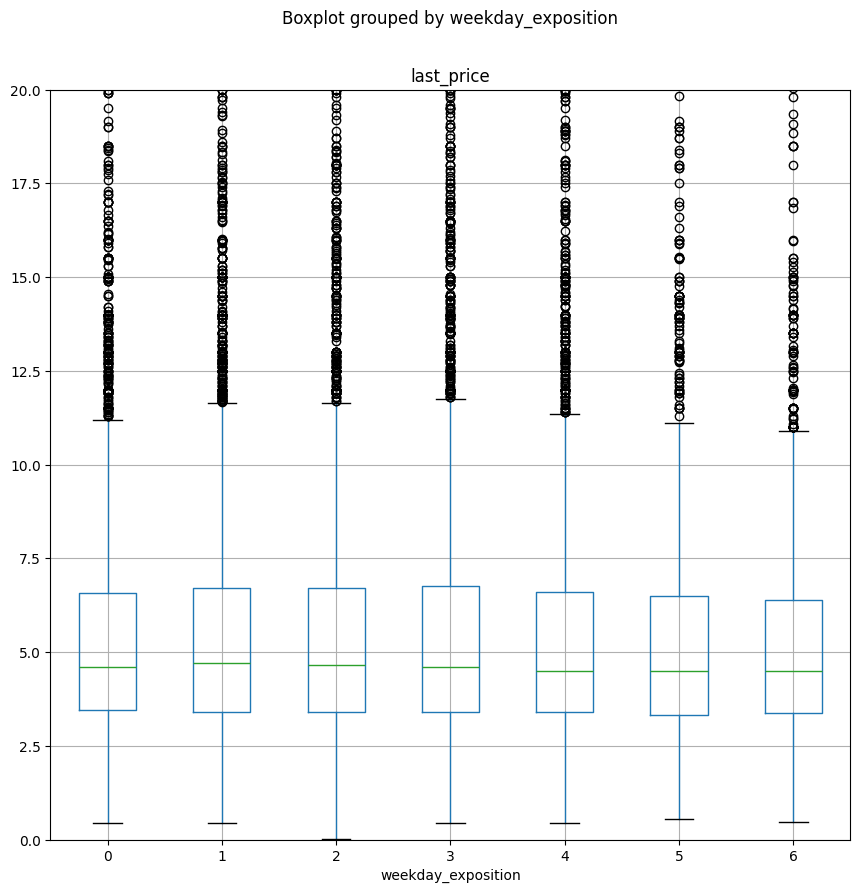

In [150]:
plot = data.boxplot('last_price', by='weekday_exposition',figsize=(10,10)).set_ylim(0,20)

The price is slightly dependent on the day of the week of publication of the obligation, deviations within the error

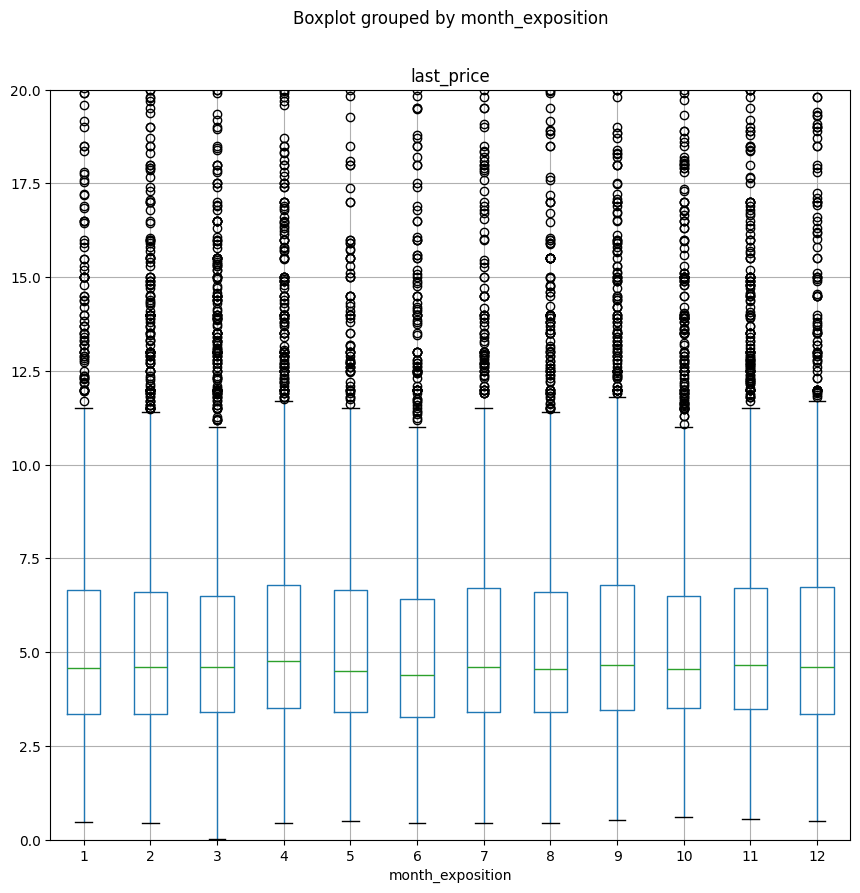

In [151]:
plot = data.boxplot('last_price', by='month_exposition',figsize=(10,10)).set_ylim(0,20)

A similar situation with a month, deviations are minimal

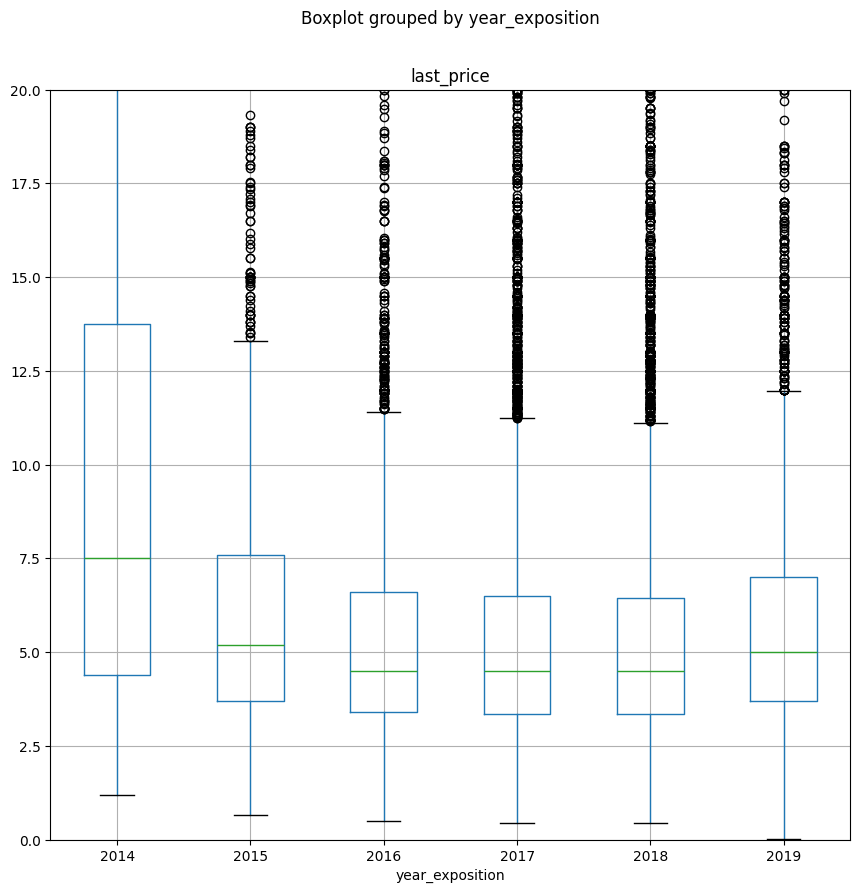

In [152]:
plot = data.boxplot('last_price', by='year_exposition',figsize=(10,10)).set_ylim(0,20)

But over the years there is already dependence, the median price in 2014 was above 7.5 million and decreased until 2016, lasted at this level 3 year and in 2019 grew again

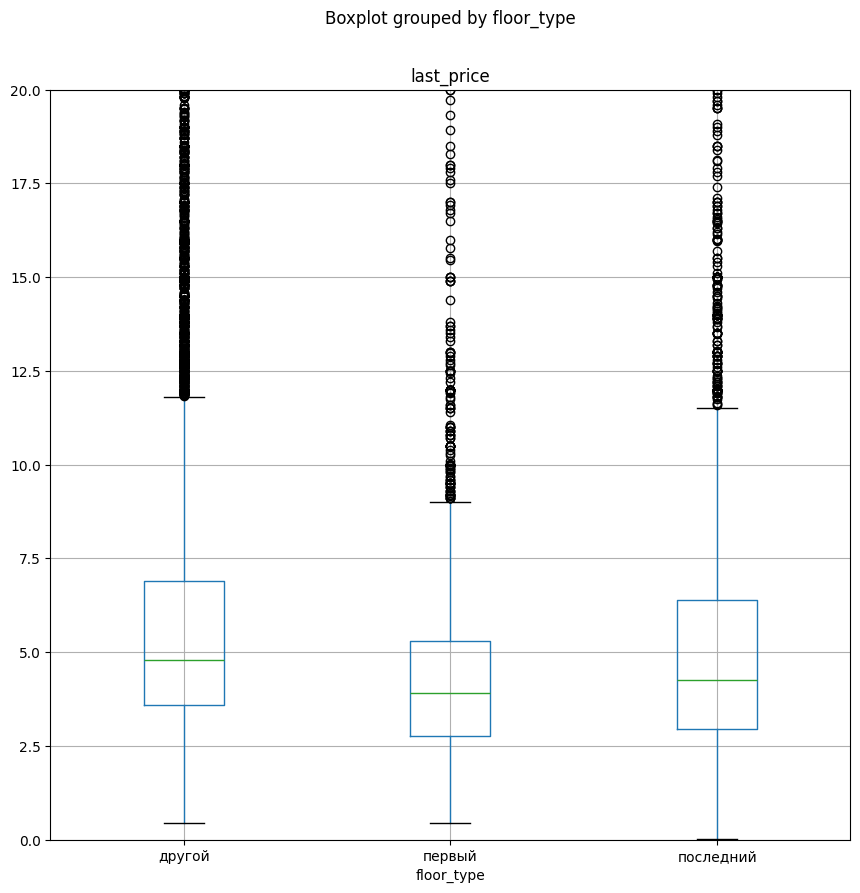

In [153]:
plot = data.boxplot('last_price', by='floor_type',figsize=(10,10)).set_ylim(0,20)

Apartments on the ground floor are cheaper.If we only watched the median, then the difference with the latter would be small, but from the boxes with a mustache it is clear that the interval scope is shifted down, towards more cheap prices.

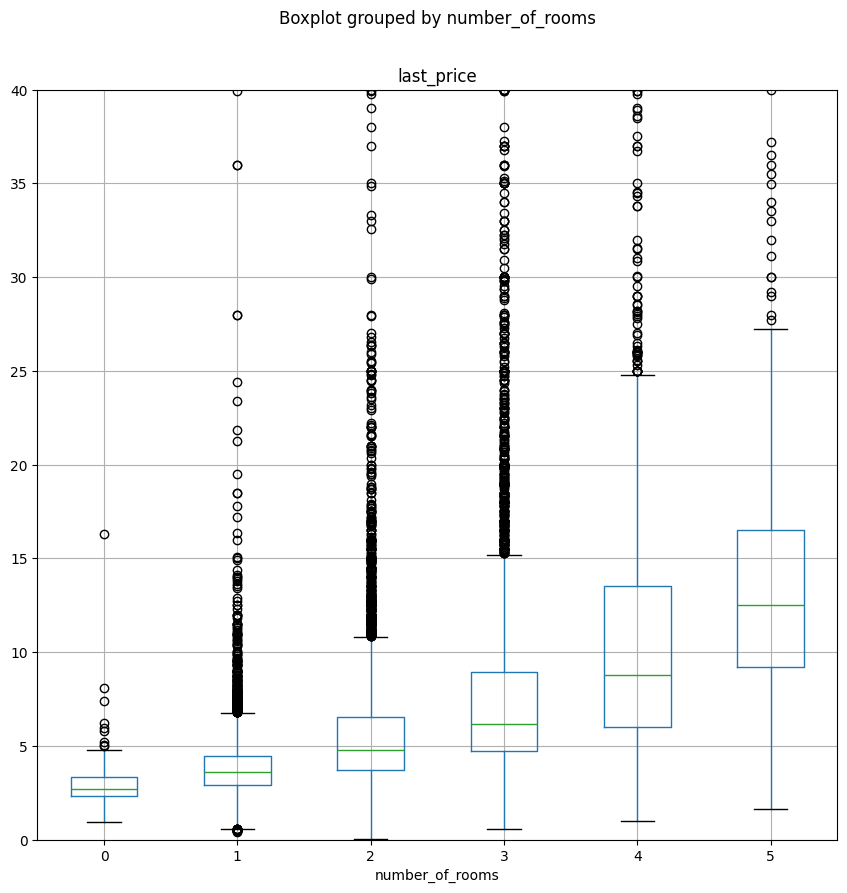

In [154]:
plot = data.boxplot('last_price', by='number_of_rooms',figsize=(10,10)).set_ylim(0,40)

Here the dependence is huge, I even had to increase the range, which cut off the emissions, now we see that these emissions were formed - apartments with a large number of rooms are proportional more, up to the difference in prices by an order of magnitude higher

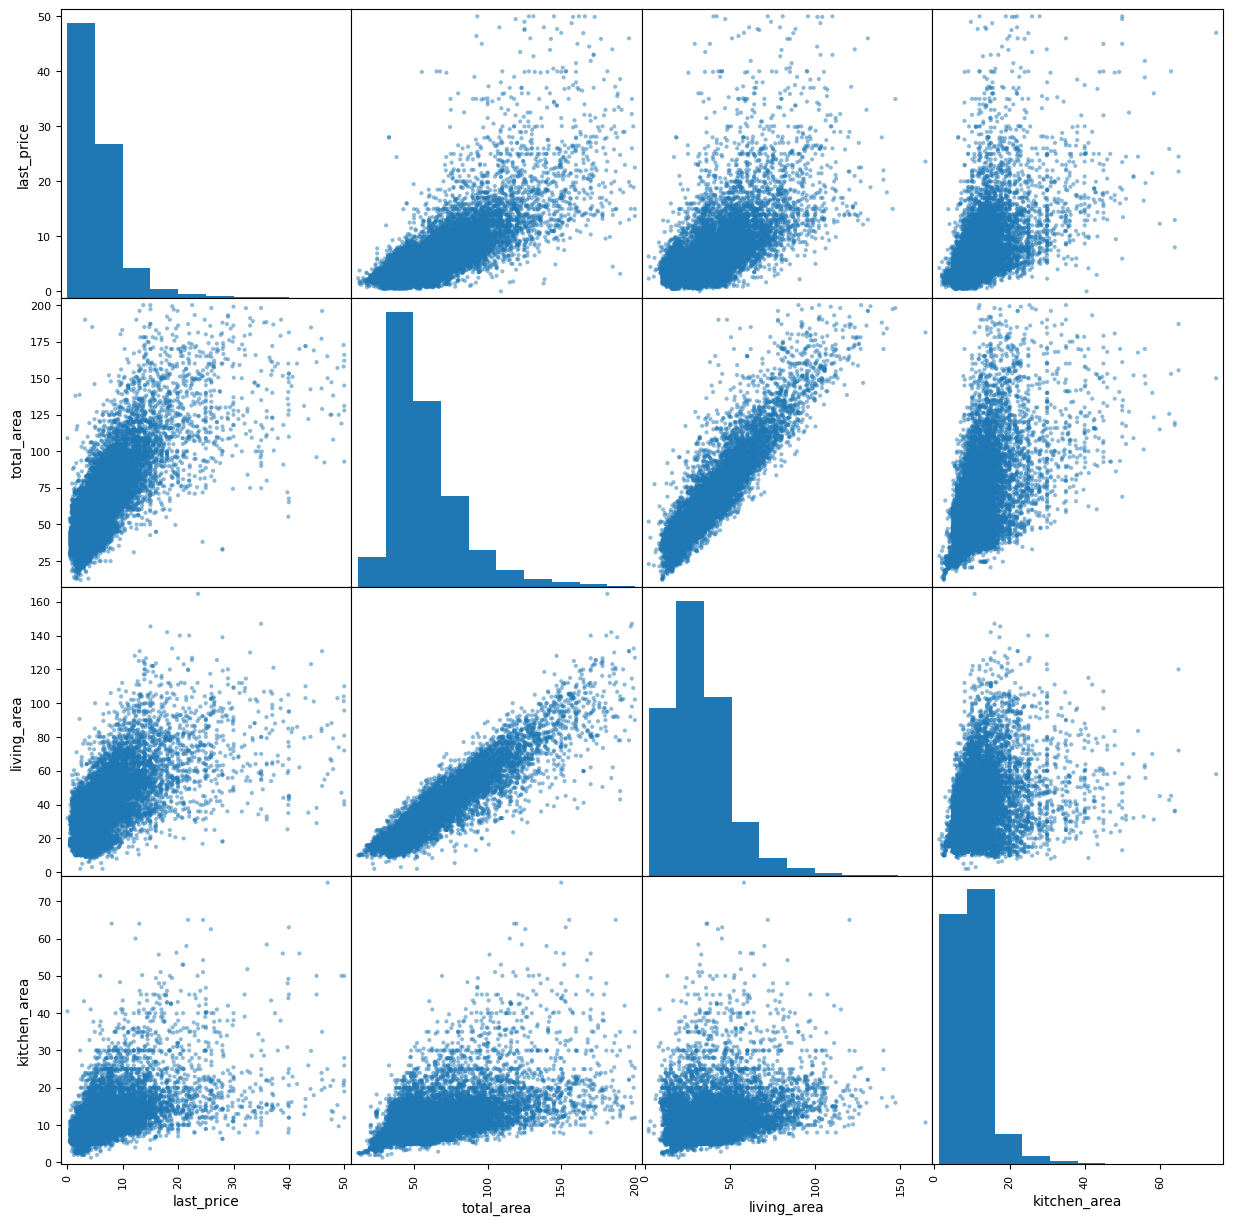

In [155]:
price_to_area = data[['last_price', 'total_area', 'living_area', 'kitchen_area']]
pd.plotting.scatter_matrix(price_to_area, figsize=(15, 15));

In [156]:
price_to_area.corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.00,0.76,0.65,0.59
total_area,0.76,1.00,0.93,0.58
living_area,0.65,0.93,1.00,0.33
kitchen_area,0.59,0.58,0.33,1.00


There is a correlation of the price with the area, which was obvious, the total area, less living, even more than the area of ​​the kitchen.Most likely, the price is formed by the total area, and the living space and area of ​​the kitchen are the parameters dependent on the total area, which we saw at the stage of work with the passes

### We calculate the average price of one square meter by cities

We will take the average price of one square meter in 10 settlements with the largest number of ads.

In [157]:
data.head()

,first_day_exposition,days_exposition,locality_name,city_centers_nearest,airports_nearest,parks_nearest,ponds_nearest,parks_around3000,ponds_around3000,number_of_rooms,number_of_balconies,total_area,living_area,kitchen_area,floors_total,floor,ceiling_height,is_apartment,is_studio,is_open_plan,last_price,total_images,price_for_m2,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,2019-03-07,NaN,санкт-петербург,"16,028.00","18,863.00",482.00,755.00,1.00,2.00,3,0,108.00,51.00,25.00,16,8,2.70,False,False,False,13.00,20,"120,370.37",3,3,2019,другой,16.00
1,2018-12-04,81.00,поселок шушары,"18,603.00","12,817.00",NaN,NaN,0.00,0.00,1,2,40.40,18.60,11.00,11,1,NaN,False,False,False,3.35,7,"82,920.79",1,12,2018,первый,19.00
2,2015-08-20,558.00,санкт-петербург,"13,933.00","21,741.00",90.00,574.00,1.00,2.00,2,0,56.00,34.30,8.30,5,4,NaN,False,False,False,5.20,10,"92,785.71",3,8,2015,другой,14.00
4,2018-06-19,121.00,санкт-петербург,"8,098.00","31,856.00",112.00,48.00,2.00,1.00,2,0,100.00,32.00,41.00,14,13,3.03,False,False,False,10.00,2,"100,000.00",1,6,2018,другой,8.00
5,2018-09-10,55.00,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,30.40,14.40,9.10,12,5,NaN,False,False,False,2.89,10,"95,065.79",0,9,2018,другой,NaN


In [158]:
top_ten_locations = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
data.query('locality_name in @top_ten_locations.index').groupby('locality_name')['price_for_m2'].mean().sort_values(ascending=False)

locality_name
санкт-петербург     112,249.66
пушкин              103,213.47
деревня кудрово      92,473.55
поселок парголово    90,332.26
поселок мурино       85,681.76
поселок шушары       78,677.36
колпино              75,333.30
гатчина              68,746.15
всеволожск           68,654.47
выборг               58,141.91
Name: price_for_m2, dtype: float64

The most expensive (115 thousand per sq.m on average) the city in the list of top 10 in terms of ads is St. Petersburg, the most cheap (58 thousand per sq.m on average) Vyborg

### Sash the average price of each kilometer to the center in ads from St. Petersburg

In [159]:
data.query('locality_name == "санкт-петербург"').pivot_table(
    index='city_centers_nearest_km', 
    values='price_for_m2', 
    aggfunc=('mean', 'median')
)

,mean,median
city_centers_nearest_km,,
0.00,"207,902.57","142,138.43"
1.00,"147,237.52","126,507.94"
2.00,"139,674.57","121,135.10"
3.00,"119,789.51","109,756.10"
4.00,"127,978.07","118,055.56"
5.00,"136,415.69","127,160.49"
6.00,"141,371.73","129,251.70"
7.00,"142,538.45","124,390.24"
8.00,"124,070.00","122,549.02"


The price is inversely proportional to the distance from the center.Each kilometer from the center makes an apartment cheaper.
Apartments in the center have a great difference between the median value and the average, that is, there are more emissions with high prices, which are reflected at the average indicator, the farther the apartment is from the center, the lower this effect and the price stabilizes

## General conclusion

### Brief List of Actions done:
- We have done a research analysis
- Getting rid of passes in columns with the number of balconies and the status of pharmacies filling them with zeros and the Boolean value of FALSE, respectively
- Getting rid of passes using in the columns of the living space, the area of ​​the kitchen, the number of storeys of the house MissForest method
- formatted and grouped columns
- checked the presence of obvious duplicates, they were not found
- removed the lines in which the name of the settlement is absent
- deleted duplicate names of settlements
- cut off abnormal values ​​for several indicators in which there were emissions (ceiling height, price, number of rooms, total area)
- added new columns (the price of one square meter, day of the week, month and year of publication, type of floor floor, distance to the city center in kilometers)

### during the study, we found out that:
- the total area begins about 30 meters, has a peak around 50 meters and gradually subsides to 150 meters
- Residential area has peaks near 18, 30 and a small peak near 43 meters.Most likely this is due to the number of rooms
-Most 1-room apartments, a little less than 2 rooms, after 4-5 rooms there is a tail
- ceiling height most common from 2.5 mattress to 3 meters
- more often the apartment is not on the first and not on the top floor, but somewhere between
- apartments on the ground floor cheaper than others
- In terms of distance from the center there are two large peaks, at 5 km and 12 km.Apparently one peak is Peter and other cities
- Almost no one lives next to the Eerorta (or does not want to talk about it in the ad)
- The bulk of the parks are approximately 500 m from housing
- ads are more often given on working days and spring
- They hang for about 95 days in the median.We also have peaks for 45 and 60 days, most likely this is a standard number of days for which an ad
- the price is slightly dependent on the day of the week and the month of publication of the obligation
- The apartments have fallen in price since 2014
- The more rooms the more expensive rooms
- the total area greatly affects the price
- The closer to the center the apartment is more expensive, and the more emissions at the price

In general, the conclusions were obvious, but we checked them and confirmed them